## Import Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


## ABOUT DATASET
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Load Data set

In [3]:
df=pd.read_csv("Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Understanding data

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Duplicate rows

In [7]:
df.duplicated().sum()

0

## Missing values

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Descriptive statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Exploratory Data Analysis

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

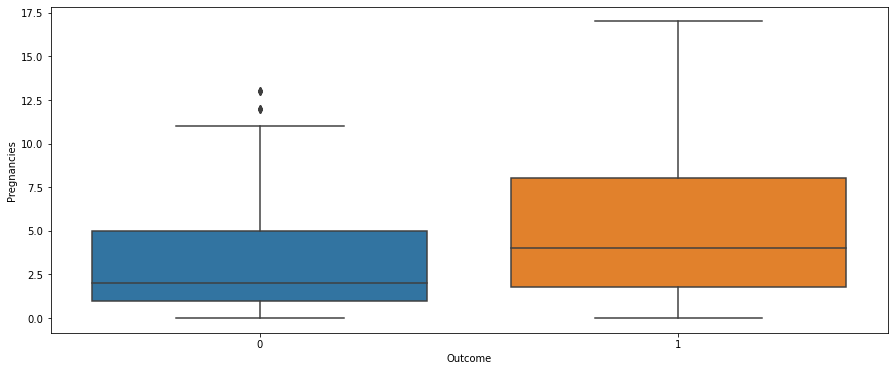

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['Pregnancies'])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

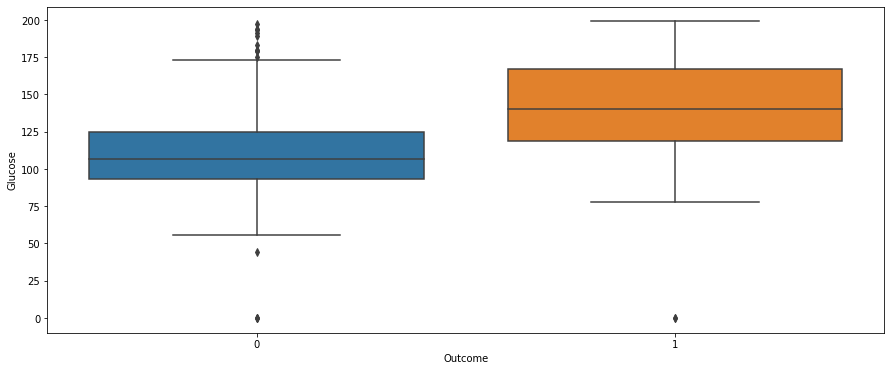

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['Glucose'])

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

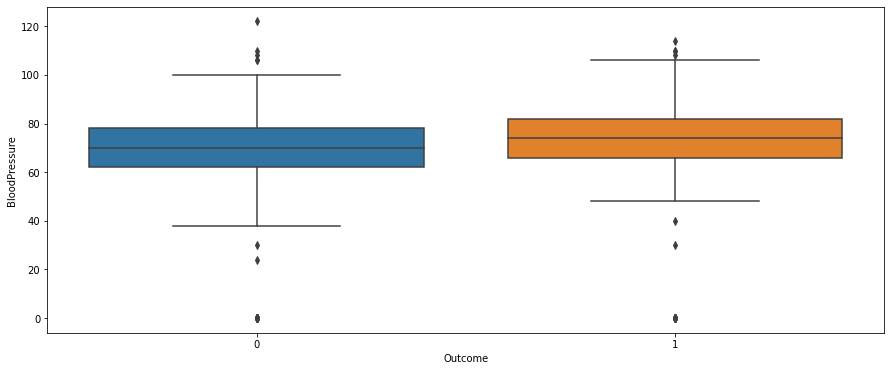

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['BloodPressure'])

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

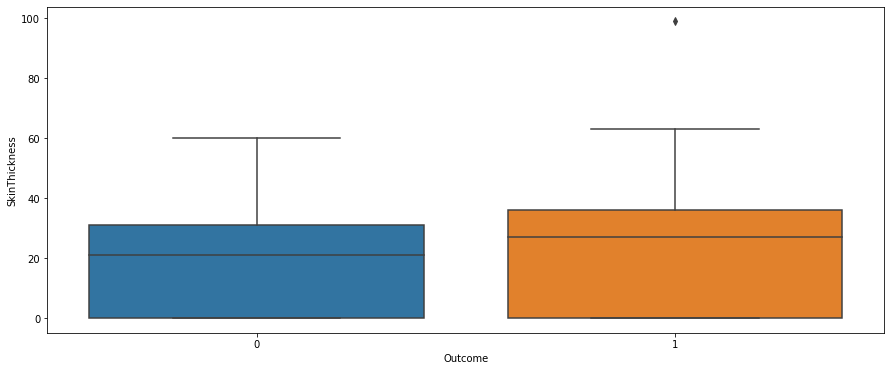

In [29]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['SkinThickness'])

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

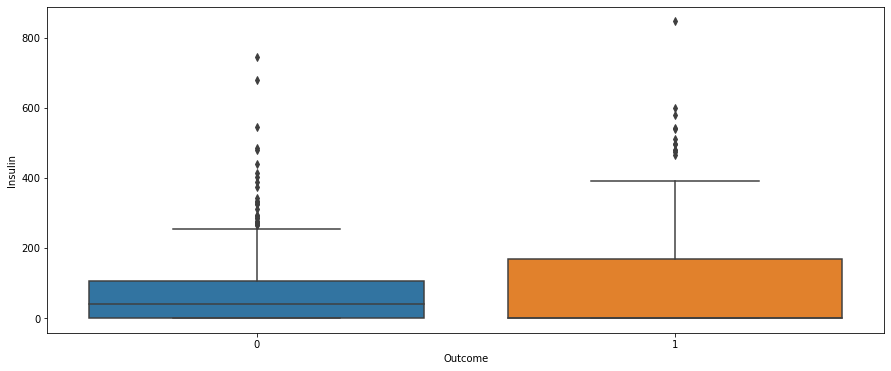

In [30]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['Insulin'])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

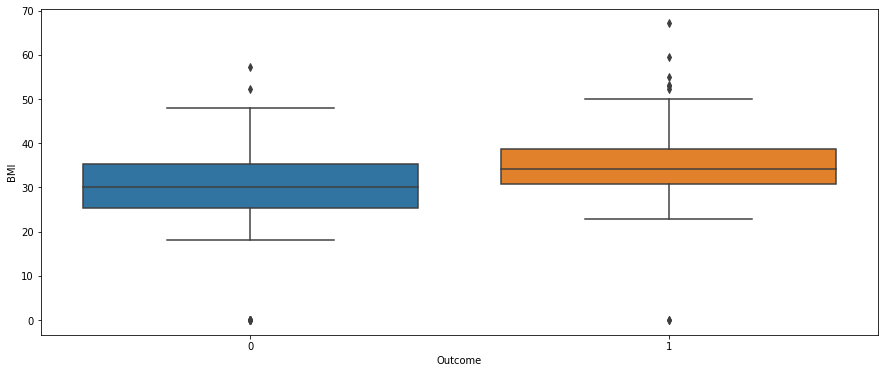

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['BMI'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

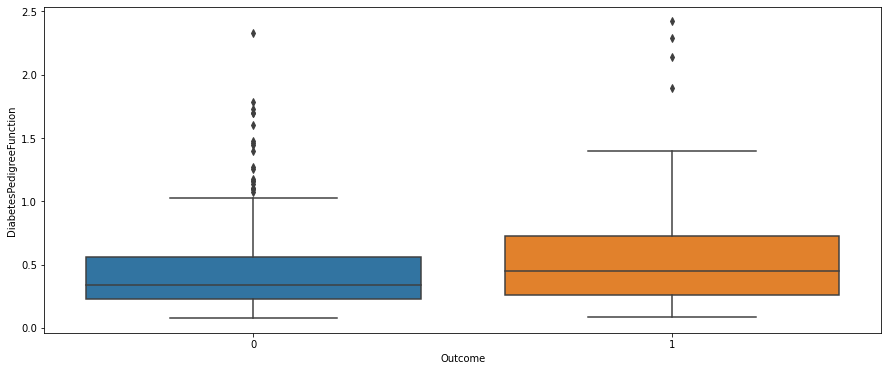

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

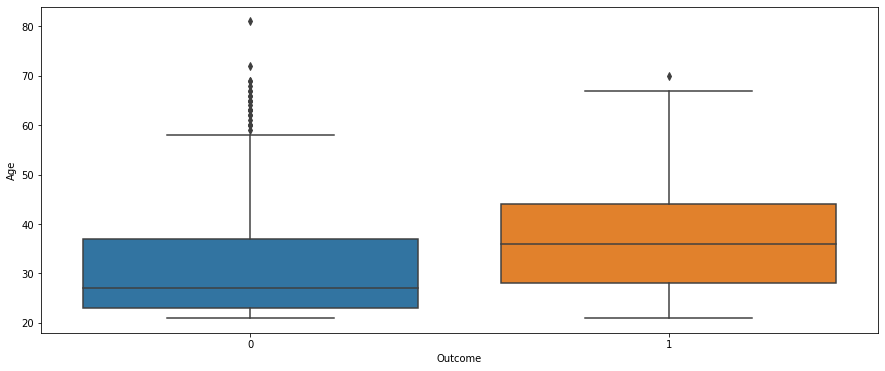

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Outcome'], y=df['Age'])

### Correlation Map

<AxesSubplot:>

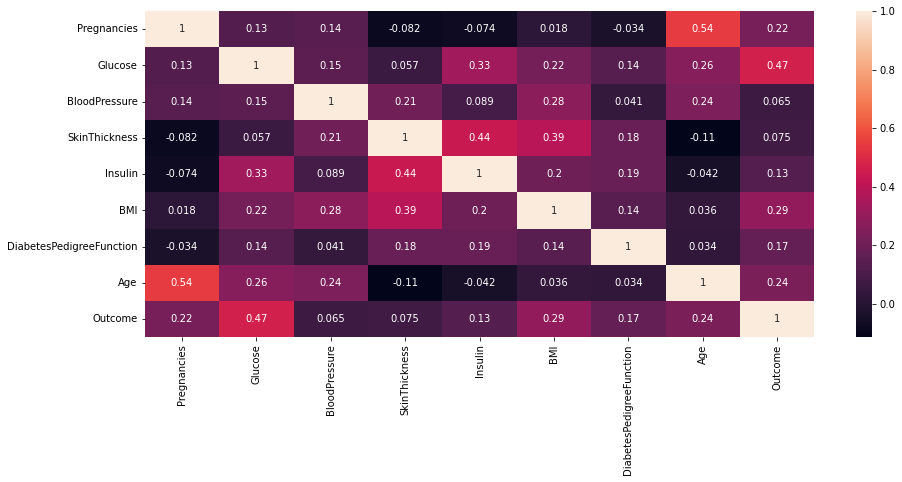

In [37]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

### Machine Learning Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [39]:
X=df.drop("Outcome", axis=1)
y=df['Outcome']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Train shape:", X_train.shape, "Test_shape:", X_test.shape)

Train shape: (576, 8) Test_shape: (192, 8)


In [42]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()
}

In [43]:
for name, model in models.items():
    print(f'Training Model {name} \n')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' ))
    print('*-*'*30)

Training Model LR 

Training Accuracy: 0.7708333333333334
Testing Accuracy: 0.7916666666666666
Recall Score :  0.7916666666666666
Precision Score :  0.7916666666666666
Testing F-1: 0.7916666666666666
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model KNN 

Training Accuracy: 0.7864583333333334
Testing Accuracy: 0.7552083333333334
Recall Score :  0.7552083333333334
Precision Score :  0.7552083333333334
Testing F-1: 0.7552083333333334
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model DT 

Training Accuracy: 1.0
Testing Accuracy: 0.7135416666666666
Recall Score :  0.7135416666666666
Precision Score :  0.7135416666666666
Testing F-1: 0.7135416666666666
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model RF 

Training Accuracy: 1.0
Testing Accuracy: 0.7916666666666666
Recall Score :  0.7916666666666666
Precision Score :  0.79166